In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

df = pd.read_excel('nailSalonsinOttawa.xlsx').convert_dtypes()
print(df.head())

                      place_id               name  \
0  ChIJ69F51hYFzkwRE98saI2_k8M      Cony Nail Spa   
1  ChIJDyR-NP0EzkwRRQfHmVD03pY  Smudge Beauty Bar   
2  ChIJ43YnzVMFzkwR3OjSDP5sDbs  La Crystal Studio   
3  ChIJn9x9Hl8FzkwR3KhkNqjwglY         Dope Nails   
4  ChIJWeiI2zMFzkwRw0dhDBCHaDE    Rideau Nail Spa   

                                         description  is_spending_on_ads  \
0  Welcome to Cony Nail Spa, your oasis of relaxa...               False   
1  Smudge is an easy-going, chilled out beauty sh...               False   
2          Your local nail salon in downtown Ottawa.               False   
3            We’re here to make your Nails look DOPE               False   
4  Nestled in the heart of Ottawa, Rideau Nail Sp...               False   

   reviews  rating                                        competitors  \
0      284     4.8  Name: Dope Nails
Link: https://www.google.com/...   
1      473     4.8  Name: La Crystal Nail & Spa
Link: https://www....   
2    

In [ ]:
# pip install folium    will use this for mapping out the locations, only need to install once

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   place_id               109 non-null    string 
 1   name                   109 non-null    string 
 2   description            72 non-null     string 
 3   is_spending_on_ads     109 non-null    boolean
 4   reviews                109 non-null    Int64  
 5   rating                 109 non-null    Float64
 6   competitors            108 non-null    string 
 7   website                89 non-null     string 
 8   phone                  107 non-null    string 
 9   can_claim              109 non-null    boolean
 10  owner_name             109 non-null    string 
 11  owner_profile_link     104 non-null    string 
 12  featured_image         109 non-null    string 
 13  main_category          109 non-null    string 
 14  categories             109 non-null    string 
 15  workda

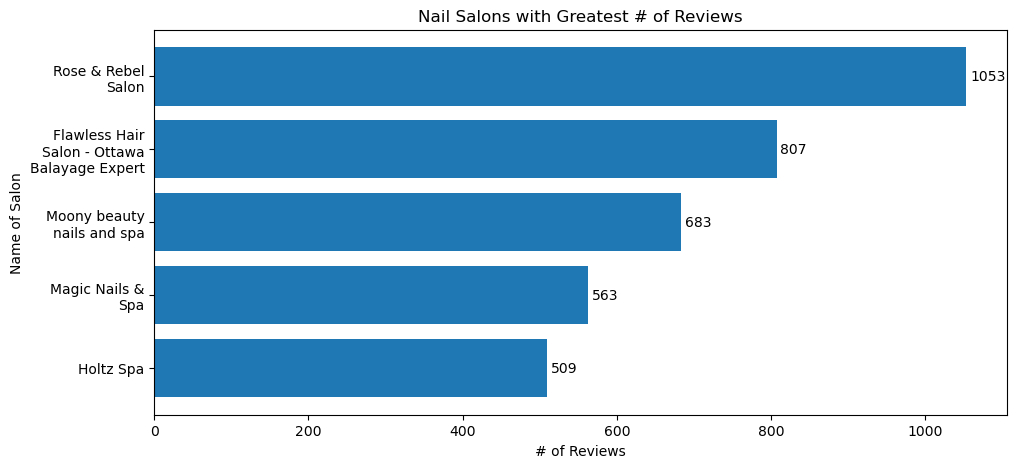

In [3]:
import textwrap

top_reviews = df.nlargest(5,["reviews"], keep='all').sort_values(by="reviews", ascending=True)[["name","rating","reviews","Ward"]]
reviews = list(top_reviews["reviews"])
salon_name = list(top_reviews["name"])

plt.figure(figsize=(11, 5))

wrapped_labels = ['\n'.join(textwrap.wrap(name, width=15)) for name in salon_name]

plt.barh(wrapped_labels, reviews)
plt.title('Nail Salons with Greatest # of Reviews')
plt.ylabel('Name of Salon')
plt.xlabel('# of Reviews')
for i, v in enumerate(reviews):
    plt.text(v + 5, i, str(v), va='center', fontsize=10)  # Adjusting 5 for spacing

plt.show()

Text(0, 0.5, '# of Reviews')

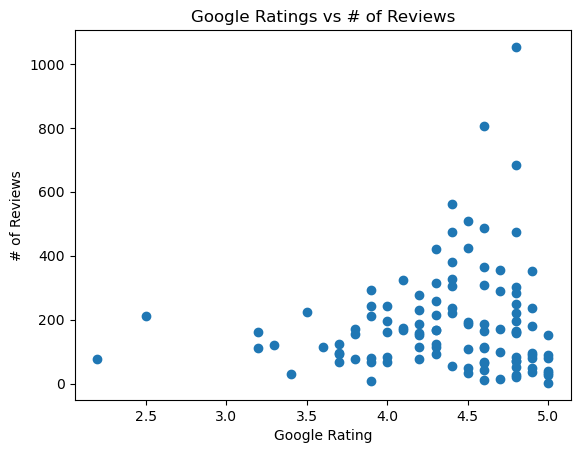

In [25]:
scatter_fig, scatter_ax = plt.subplots()
scatter_ax.scatter(df["rating"], df["reviews"])
scatter_ax.set_title("Google Ratings vs # of Reviews")
scatter_ax.set_xlabel("Google Rating")
scatter_ax.set_ylabel("# of Reviews")

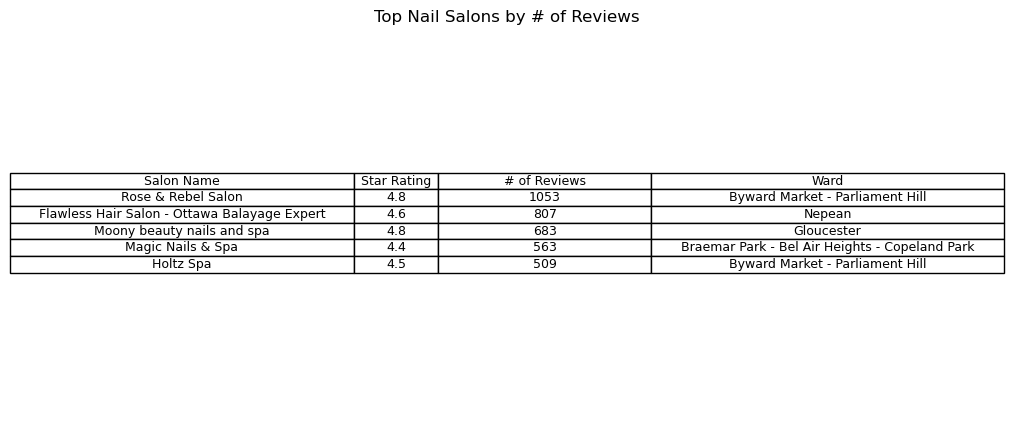

In [4]:
fig, ax = plt.subplots(figsize=(11,5))

# Hide axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
ax.set_frame_on(False)  

table_column_names = ("Salon Name","Star Rating","# of Reviews","Ward")
top_reviews_sortedDesc = top_reviews.sort_values(by="reviews", ascending=False)

# Create table
table = ax.table(cellText=top_reviews_sortedDesc.values, 
                 colLabels=table_column_names, 
                 cellLoc='center', 
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(9)
table.auto_set_column_width([0, 1, 3])  # Auto-adjust column width

plt.title("Top Nail Salons by # of Reviews")
plt.show()

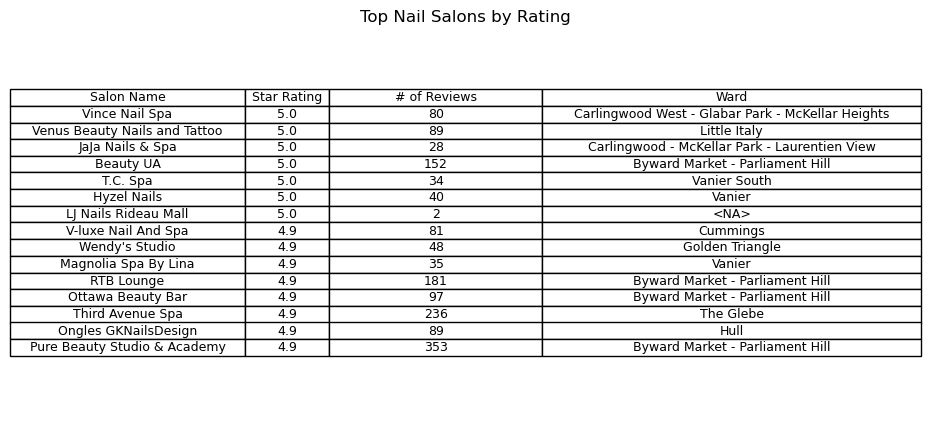

In [5]:
top_rated = df.nlargest(10,["rating"], keep='all').sort_values(by="rating", ascending=False)[["name","rating","reviews","Ward"]]

table_column_names = ("Salon Name","Star Rating","# of Reviews","Ward")

fig, ax = plt.subplots(figsize=(11,5))

# Hide axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
ax.set_frame_on(False)  

# Create table
table = ax.table(cellText=top_rated.values, 
                 colLabels=table_column_names, 
                 cellLoc='center', 
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(9)
table.auto_set_column_width([0, 1, 3])  # Auto-adjust column width

plt.title("Top Nail Salons by Rating")
plt.show()


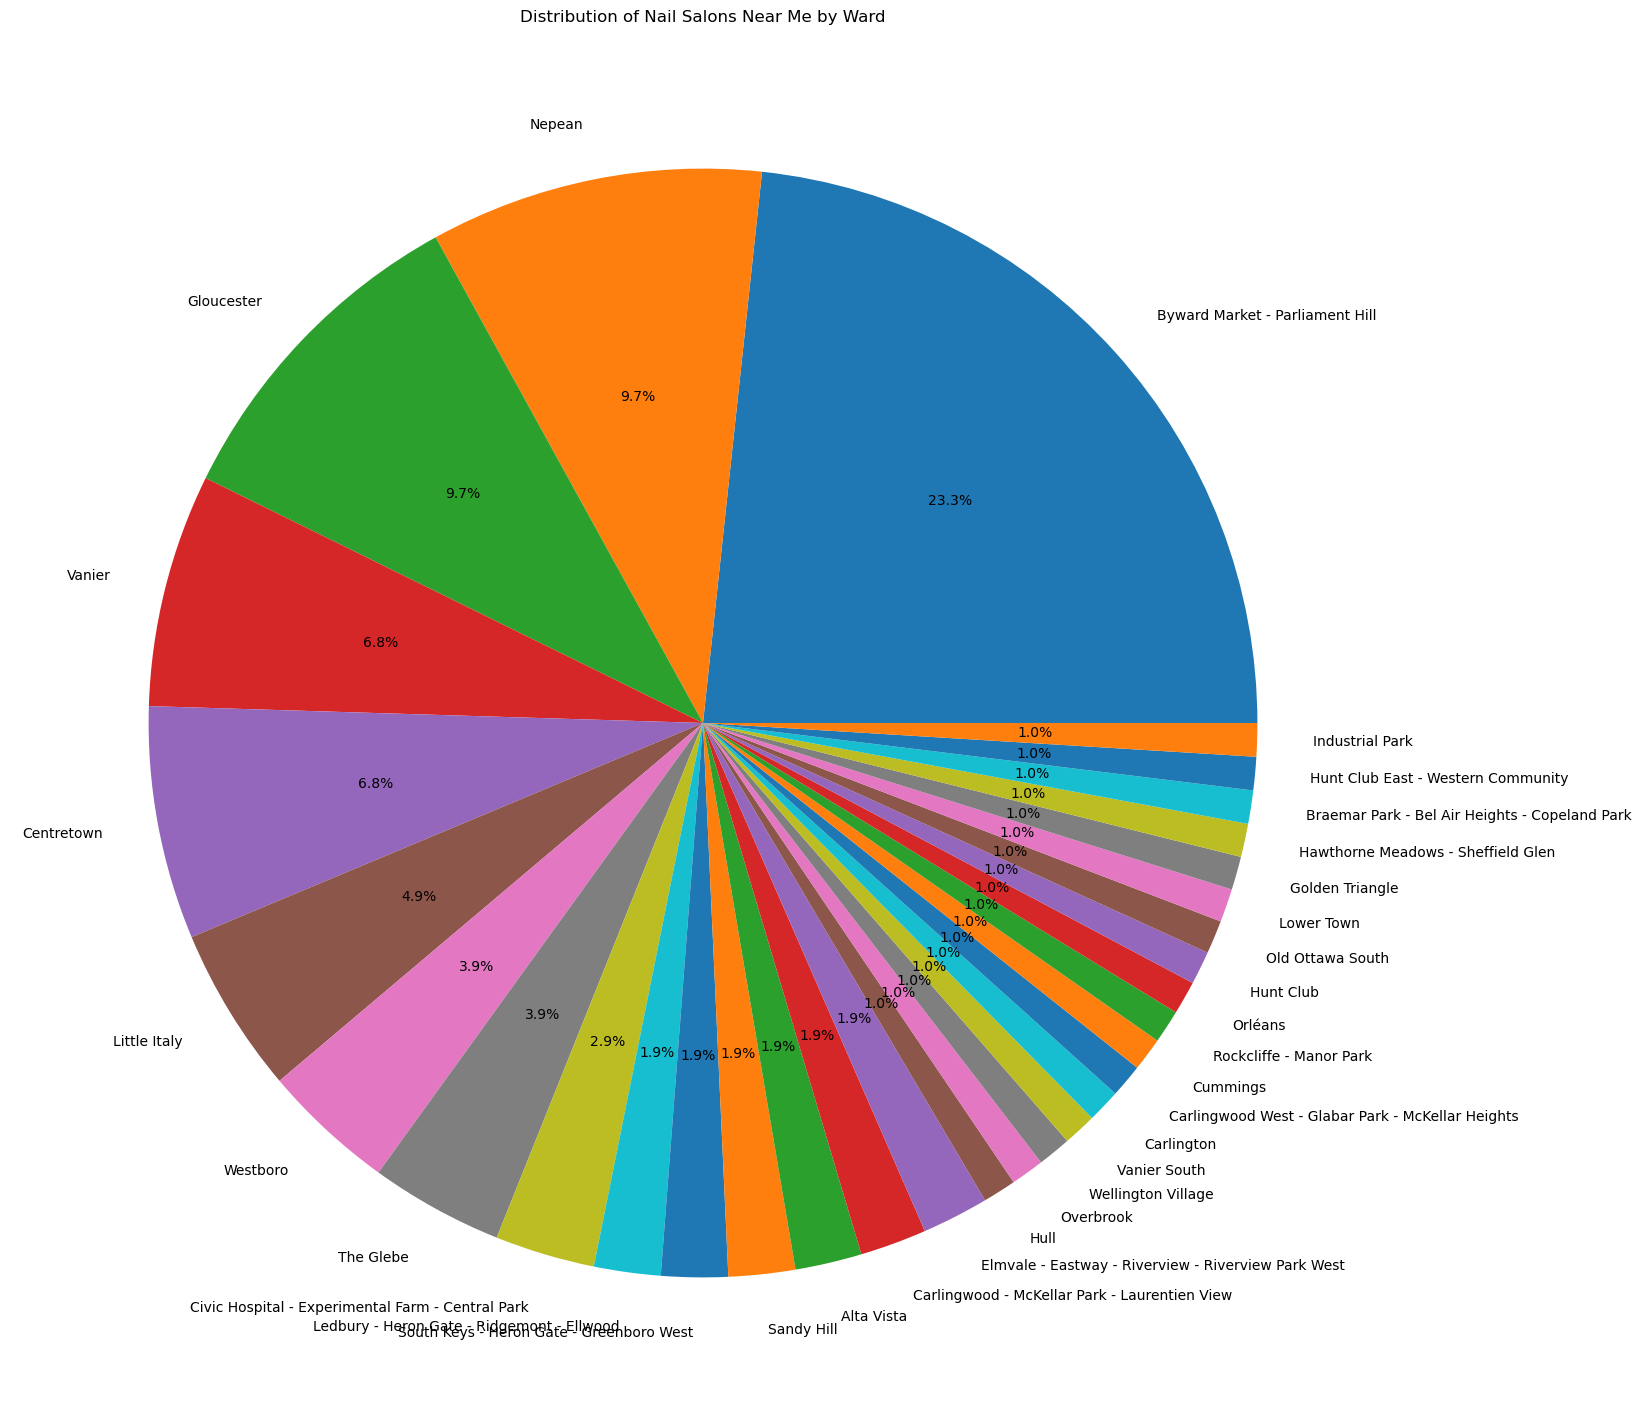

In [26]:
grouped_ward = df.groupby('Ward').name.nunique().sort_values(ascending=False)
count_of_salons = grouped_ward.values
pie_chart_labels = grouped_ward.index

plt.figure(figsize=(18, 18))
plt.title('Distribution of Nail Salons Near Me by Ward')
plt.pie(count_of_salons, labels=pie_chart_labels, autopct='%1.1f%%')
plt.show()


In [19]:
ottawa_center = [45.4215, -75.6993]

# Create a folium map centered on Ottawa
map = folium.Map(location=ottawa_center, zoom_start=12)

for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longtitude']], 
        popup=row['name'],  
        icon=folium.Icon(color="purple", icon="info-sign") 
    ).add_to(map)

map

In [40]:
grouped_closedDays = df.groupby('closed_on').name.nunique().sort_values(ascending=False)
print(grouped_closedDays)

closed_on
Open All Days         55
Sunday                33
Monday, Sunday        11
Monday                 4
Saturday, Sunday       3
Tuesday, Sunday        1
Tuesday, Wednesday     1
Name: name, dtype: int64


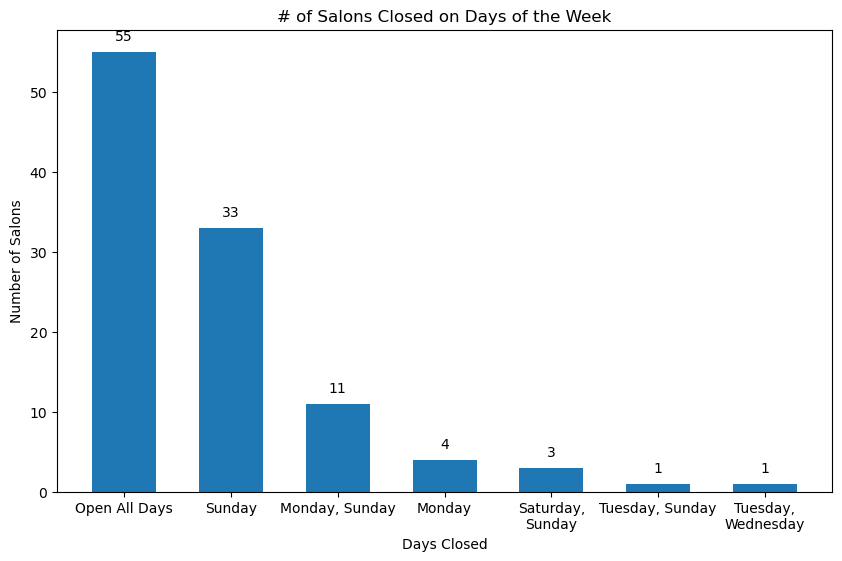

In [58]:
number_of_salons = grouped_closedDays.values
closed_days = grouped_closedDays.index

fig, ax = plt.subplots(figsize=(10,6))
                      
wrapped_labels = ['\n'.join(textwrap.wrap(day, width=15)) for day in closed_days]
width = 0.6

data_bars = plt.bar(wrapped_labels, number_of_salons, width=width)

plt.title('# of Salons Closed on Days of the Week')
plt.ylabel('Number of Salons')
plt.xlabel('Days Closed')

# Adding labels using enumerate()
for i, v in enumerate(number_of_salons):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)
    
plt.show()

In [88]:
salons_opened_all_days = df.loc[df["closed_on"]=="Open All Days", ["name", "reviews","rating","workday_timing"]]

new_column_names = {
    "name":"Salon Name",
    "reviews":"# of Reviews",
    "rating":"Google Rating",
    "workday_timing":"Operating Hours"
}

salons_opened_all_days= salons_opened_all_days.rename(columns = new_column_names)

salons_opened_all_days.sort_values(by=["Google Rating"], ascending=False).reset_index(drop=True)

,Salon Name,# of Reviews,Google Rating,Operating Hours
0,LJ Nails Rideau Mall,2,5.0,10 a.m.–9 p.m.
1,Vince Nail Spa,80,5.0,10 a.m.–7:30 p.m.
2,Venus Beauty Nails and Tattoo,89,5.0,10 a.m.–7:30 p.m.
3,JaJa Nails & Spa,28,5.0,10 a.m.–7 p.m.
4,RTB Lounge,181,4.9,10 a.m.–8 p.m.
5,Ottawa Beauty Bar,97,4.9,10 a.m.–7 p.m.
6,V-luxe Nail And Spa,81,4.9,10 a.m.–7 p.m.
7,Moony beauty nails and spa,683,4.8,10 a.m.–7 p.m.
8,Catchy Beauty Eyelash Extensions,248,4.8,9 a.m.–6 p.m.
9,Smudge Beauty Bar,473,4.8,10 a.m.–7 p.m.
